<a href="https://colab.research.google.com/github/Sucheta97/Gen-AI-GAN/blob/main/_Capstone_GAN_based_Image_Generation_using_fashion_mnist_using_DCGAN_CGAN_AND_WGAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Libraries

In [1]:
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

In [2]:
LATENT_DIM = 100
BATCH_SIZE = 64
EPOCHS = 30
NUM_CLASSES = 10
IMG_SHAPE = (28, 28, 1)

### **Fashion-MNIST**

In [3]:
from tensorflow.keras.datasets import fashion_mnist

(train_images, train_labels), (_, _) = fashion_mnist.load_data()

**ONLY T-shirt images**

In [4]:
tshirt_images = train_images[train_labels == 0]

In [5]:
tshirt_images[3]

array([[  0,   0,   0,   0,   0,   0,   0,  11, 142, 200, 106,   0,   0,
          0,   0,   0,   0,   0,  85, 185, 112,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0, 152, 214, 217, 194, 236, 216, 187,
        149, 135, 153, 211, 217, 231, 205, 217, 188,  34,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  66, 185, 166, 180, 181, 190, 211, 221,
        197, 146, 198, 206, 191, 168, 190, 172, 188, 175,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 135, 153, 160, 175, 180, 170, 186, 187,
        190, 188, 190, 187, 174, 195, 185, 174, 161, 175,  59,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 161, 147, 160, 170, 178, 177, 180, 168,
        173, 174, 171, 185, 184, 185, 172, 171, 164, 174, 120,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   2, 175, 146, 145, 168, 178, 181, 185, 180,
        184, 178, 179, 187, 191, 193, 190, 181, 171, 172, 158,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  35, 177, 155, 140, 151, 172, 191, 187, 186,
        187, 186, 187, 182, 191, 194, 188, 180, 161, 161, 185,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  59, 170, 153, 141, 120, 154, 160, 161, 172,
        168, 166, 161, 165, 172, 170, 164, 139, 149, 162, 166,  21,   0,
          0,   0],
       [  0,   0,   0,   0,  79, 145, 160, 214, 123, 128, 153, 160, 164,
        158, 157, 154, 155, 170, 165, 141, 195, 193, 152, 166,  61,   0,
          0,   0],
       [  0,   0,   0,   0, 100, 157, 225, 245, 175, 113, 174, 158, 158,
        160, 155, 160, 164, 178, 188, 135, 185, 240, 201, 172, 108,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  31, 174,  28, 126, 153, 166, 152, 158,
        158, 160, 161, 157, 168, 191, 188,  18, 132, 159,   7,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  82, 187, 159, 153, 157,
        158, 162, 164, 164, 154, 187, 190,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   1,   3,   5,   0,  37, 175, 158, 155, 162,
        158, 160, 162, 165, 153, 177, 205,   0,   0,   3,   3,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   1,   0,  25, 175, 152, 160, 158,
        161, 160, 164, 164, 161, 166, 200,   0,   0,   1,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   4,   0,  30, 171, 147, 164, 155,
        165, 161, 165, 162, 170, 164, 162,   0,   0,   2,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   4,   0,  57, 166, 155, 164, 166,
        161, 161, 164, 167, 165, 165, 162,  28,   0,   3,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   3,   0, 114, 161, 161, 166, 159,
        168, 161, 161, 172, 162, 165, 171,  50,   0,   5,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   1,   0, 149, 157, 167, 172, 159,
        172, 164, 161, 172, 170, 160, 171,  89,   0,   4,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   2,   0,   4, 171, 164, 166, 173, 159,
        179, 166, 160, 174, 167, 162, 166, 128,   0,   2,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   3,   0,  18, 152, 173, 160, 179, 154,
        181, 166, 164, 175, 170, 166, 170, 164,   0,   0,   1,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   4,   0,  47, 165, 172, 167, 185, 153,
        187, 173, 165, 174, 179, 166, 166, 158,   5,   0,   3,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   4,   0,  87, 180, 162, 179, 179, 157,
        191, 182, 165, 168, 190, 173, 165, 166,  20,   0,   4,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   4,   0, 105, 187, 157, 194, 175, 161,
        190, 184, 170, 158, 205, 177, 168, 171,  44,   0,   4,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   5,   0, 138, 181, 158, 205, 160, 167,
        190, 198, 167, 152, 218, 186, 170, 172,  57,   0,   5,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   5,   

In [6]:
tshirt_images = tshirt_images.reshape(-1, 28, 28, 1).astype("float32")
tshirt_images = (tshirt_images - 127.5) / 127.5

In [7]:
BUFFER_SIZE = tshirt_images.shape[0]
BATCH_SIZE = 256

train_dataset = tf.data.Dataset.from_tensor_slices(tshirt_images)\
    .shuffle(BUFFER_SIZE)\
    .batch(BATCH_SIZE)

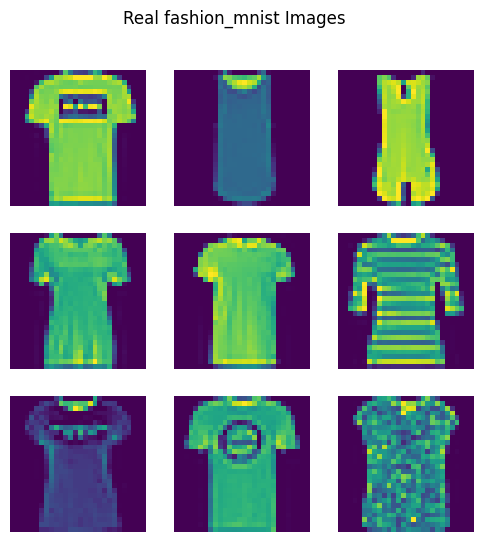

In [8]:

plt.figure(figsize=(6,6))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow((tshirt_images[i] + 1) / 2)
    plt.axis('off')
plt.suptitle("Real fashion_mnist Images")
plt.show()


In [9]:
def build_dcgan_generator():
    model = tf.keras.Sequential()

    model.add(layers.Dense(7*7*256, use_bias=False, input_shape=(100,)))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Reshape((7, 7, 256)))

    model.add(layers.Conv2DTranspose(128, (5,5), strides=(1,1), padding='same', use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(64, (5,5), strides=(2,2), padding='same', use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(1, (5,5), strides=(2,2), padding='same',
                                     use_bias=False, activation='tanh'))

    return model



# ===============================
# DISCRIMINATOR MODEL
# ===============================
def build_dcgan_discriminator():
    model = tf.keras.Sequential()

    model.add(layers.Conv2D(64, (5,5), strides=(2,2), padding='same',
                            input_shape=[28,28,1]))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(128, (5,5), strides=(2,2), padding='same'))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Flatten())
    model.add(layers.Dense(1))

    return model
generator = build_dcgan_generator()
discriminator = build_dcgan_discriminator()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    return real_loss + fake_loss

In [11]:
generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

In [12]:
noise_dim = 100

@tf.function
def train_step(images):
    noise = tf.random.normal([BATCH_SIZE, noise_dim])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        generated_images = generator(noise, training=True)

        real_output = discriminator(images, training=True)
        fake_output = discriminator(generated_images, training=True)

        gen_loss = generator_loss(fake_output)
        disc_loss = discriminator_loss(real_output, fake_output)

    gen_gradients = gen_tape.gradient(gen_loss, generator.trainable_variables)
    disc_gradients = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gen_gradients, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(disc_gradients, discriminator.trainable_variables))

    return gen_loss, disc_loss



In [13]:

def train(dataset, epochs):
    seed = tf.random.normal([16, noise_dim])

    for epoch in range(epochs):
        for image_batch in dataset:
            gen_loss, disc_loss = train_step(image_batch)

        print(f"Epoch {epoch+1}, Gen Loss: {gen_loss:.3f}, Disc Loss: {disc_loss:.3f}")

        if (epoch + 1) % 10 == 0:
            generate_images(generator, seed)



In [14]:

def generate_images(model, test_input):
    predictions = model(test_input, training=False)

    plt.figure(figsize=(4,4))
    for i in range(16):
        plt.subplot(4,4,i+1)
        plt.imshow(predictions[i,:,:,0] * 127.5 + 127.5, cmap='magma')
        plt.axis('off')
    plt.show()



Epoch 1, Gen Loss: 0.419, Disc Loss: 1.329
Epoch 2, Gen Loss: 0.552, Disc Loss: 1.451
Epoch 3, Gen Loss: 0.866, Disc Loss: 0.984
Epoch 4, Gen Loss: 0.703, Disc Loss: 0.936
Epoch 5, Gen Loss: 0.848, Disc Loss: 1.040
Epoch 6, Gen Loss: 1.014, Disc Loss: 0.956
Epoch 7, Gen Loss: 0.848, Disc Loss: 1.310
Epoch 8, Gen Loss: 0.959, Disc Loss: 0.995
Epoch 9, Gen Loss: 0.713, Disc Loss: 1.451
Epoch 10, Gen Loss: 1.091, Disc Loss: 0.906


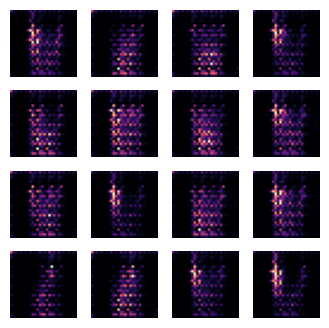

Epoch 11, Gen Loss: 0.984, Disc Loss: 1.041
Epoch 12, Gen Loss: 0.971, Disc Loss: 1.079
Epoch 13, Gen Loss: 0.711, Disc Loss: 1.400
Epoch 14, Gen Loss: 1.113, Disc Loss: 1.105
Epoch 15, Gen Loss: 0.920, Disc Loss: 1.244
Epoch 16, Gen Loss: 0.889, Disc Loss: 1.232
Epoch 17, Gen Loss: 0.862, Disc Loss: 1.170
Epoch 18, Gen Loss: 0.745, Disc Loss: 1.661
Epoch 19, Gen Loss: 0.733, Disc Loss: 1.489
Epoch 20, Gen Loss: 0.574, Disc Loss: 1.747


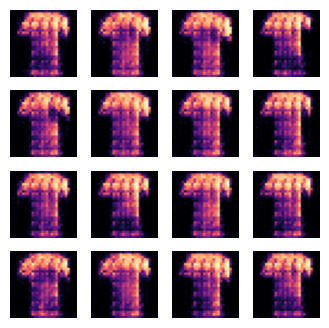

Epoch 21, Gen Loss: 0.865, Disc Loss: 1.275
Epoch 22, Gen Loss: 0.555, Disc Loss: 1.727
Epoch 23, Gen Loss: 0.705, Disc Loss: 1.487
Epoch 24, Gen Loss: 0.751, Disc Loss: 1.311
Epoch 25, Gen Loss: 0.653, Disc Loss: 1.414
Epoch 26, Gen Loss: 0.815, Disc Loss: 1.254
Epoch 27, Gen Loss: 0.630, Disc Loss: 1.474
Epoch 28, Gen Loss: 0.614, Disc Loss: 1.602
Epoch 29, Gen Loss: 0.767, Disc Loss: 1.267
Epoch 30, Gen Loss: 0.649, Disc Loss: 1.300


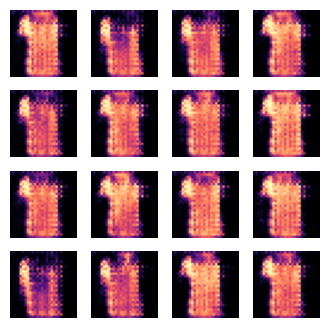

Epoch 31, Gen Loss: 0.602, Disc Loss: 1.470
Epoch 32, Gen Loss: 0.765, Disc Loss: 1.362
Epoch 33, Gen Loss: 0.607, Disc Loss: 1.423
Epoch 34, Gen Loss: 0.619, Disc Loss: 1.587
Epoch 35, Gen Loss: 0.852, Disc Loss: 1.295
Epoch 36, Gen Loss: 0.725, Disc Loss: 1.175
Epoch 37, Gen Loss: 0.563, Disc Loss: 1.524
Epoch 38, Gen Loss: 0.662, Disc Loss: 1.390
Epoch 39, Gen Loss: 0.839, Disc Loss: 1.195
Epoch 40, Gen Loss: 0.703, Disc Loss: 1.388


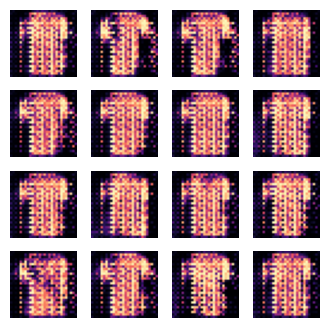

Epoch 41, Gen Loss: 0.764, Disc Loss: 1.320
Epoch 42, Gen Loss: 0.807, Disc Loss: 1.328
Epoch 43, Gen Loss: 0.770, Disc Loss: 1.139
Epoch 44, Gen Loss: 0.759, Disc Loss: 1.312
Epoch 45, Gen Loss: 1.019, Disc Loss: 0.972
Epoch 46, Gen Loss: 0.746, Disc Loss: 1.552
Epoch 47, Gen Loss: 0.670, Disc Loss: 1.540
Epoch 48, Gen Loss: 0.791, Disc Loss: 1.269
Epoch 49, Gen Loss: 0.746, Disc Loss: 1.297
Epoch 50, Gen Loss: 0.717, Disc Loss: 1.320


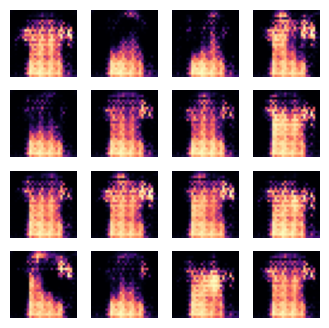

In [15]:
train(train_dataset, epochs=50)

# **Conditional GAN**

Epoch 1 completed


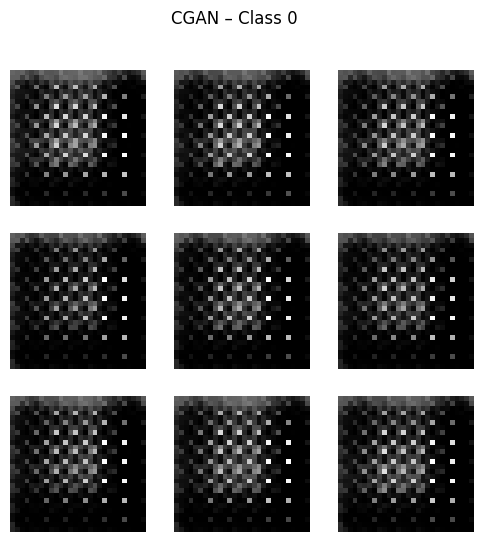

Epoch 2 completed


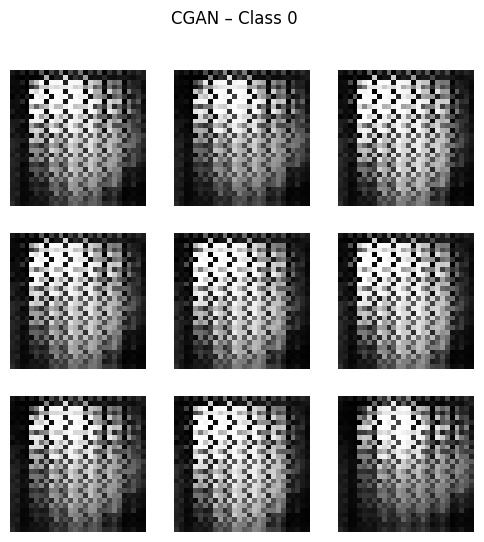

Epoch 3 completed


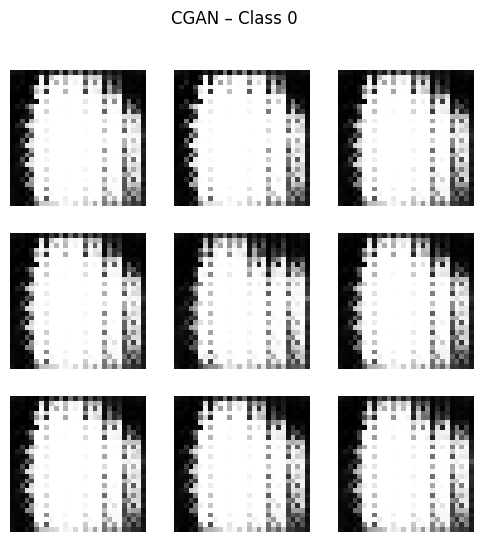

Epoch 4 completed


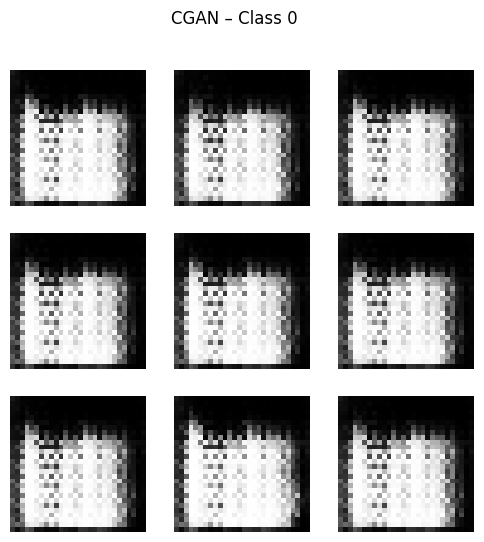

Epoch 5 completed


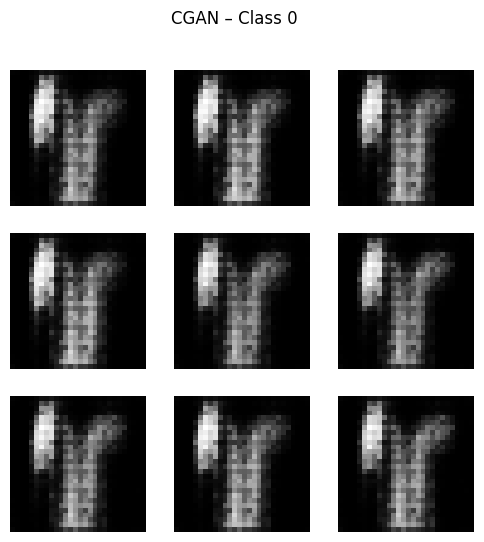

Epoch 6 completed


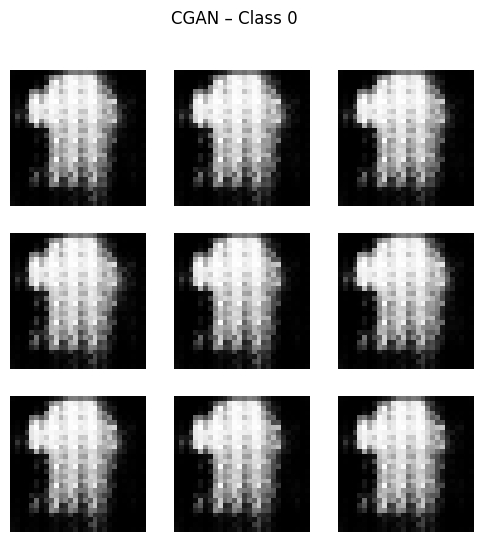

Epoch 7 completed


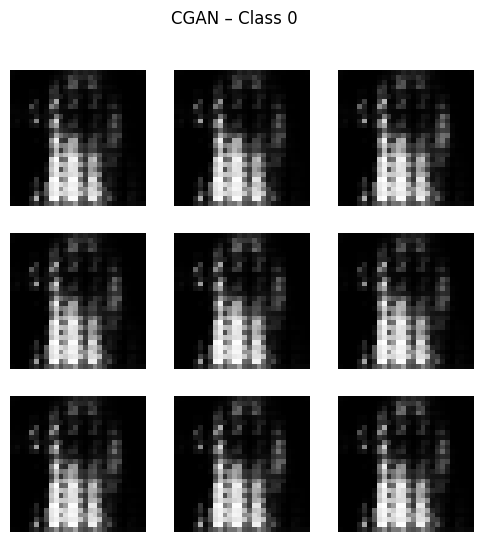

Epoch 8 completed


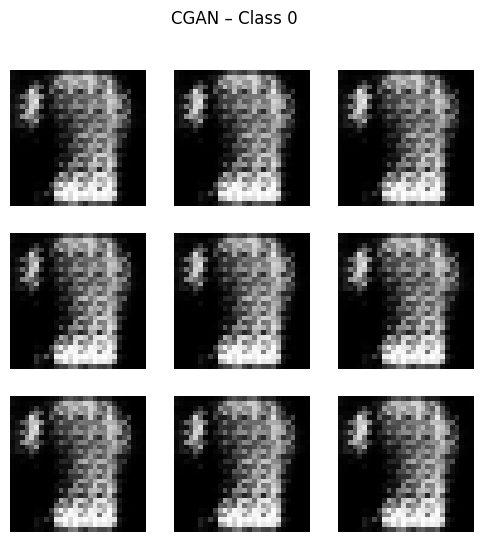

Epoch 9 completed


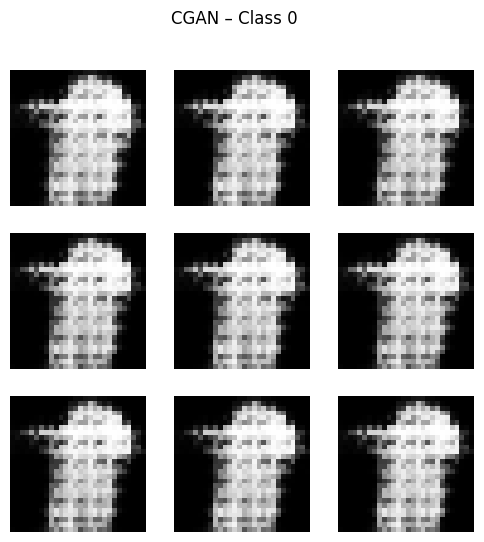

Epoch 10 completed


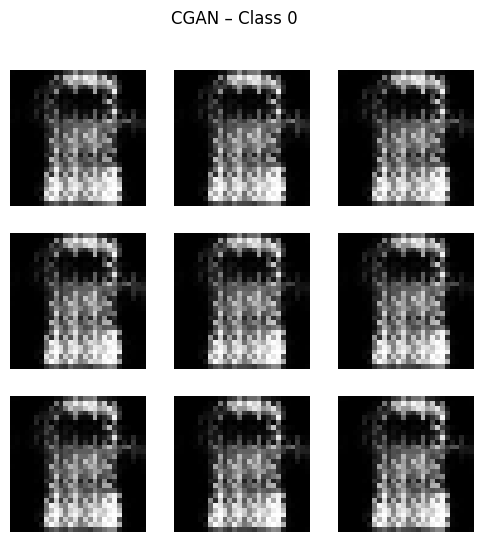

Epoch 11 completed


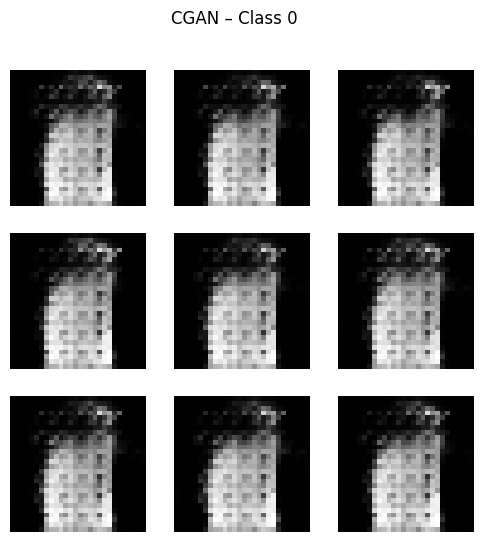

Epoch 12 completed


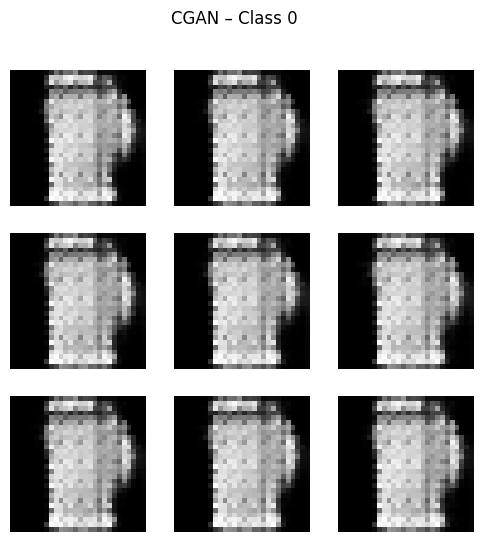

Epoch 13 completed


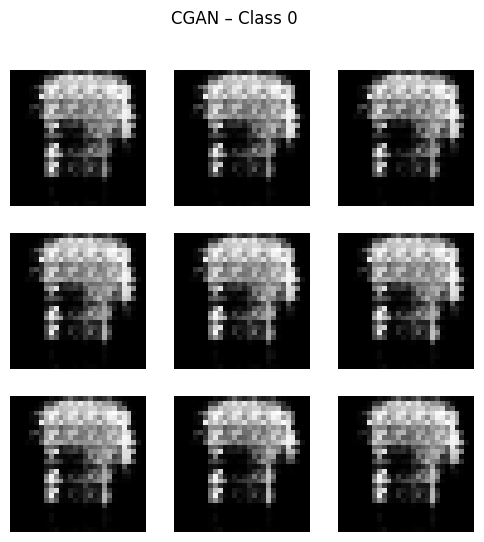

Epoch 14 completed


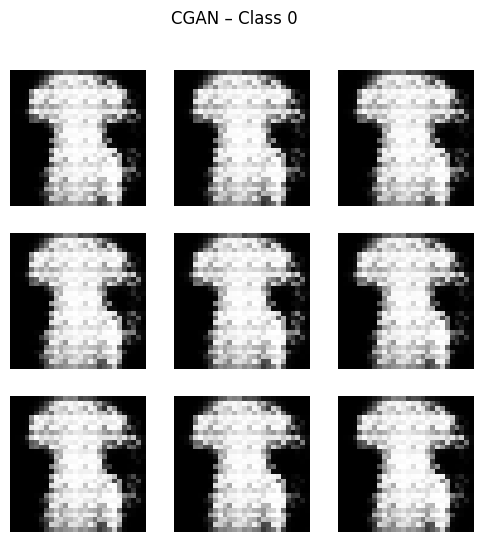

Epoch 15 completed


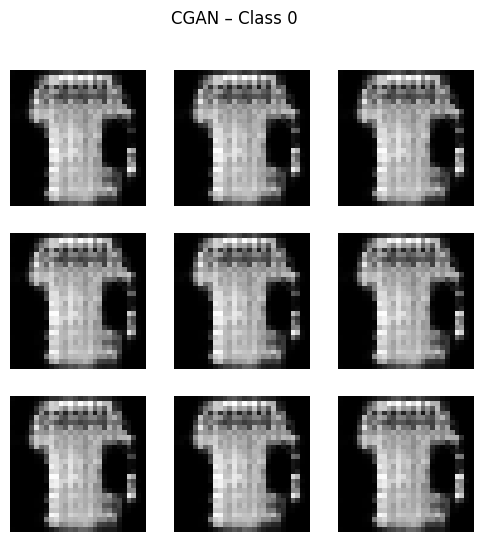

Epoch 16 completed


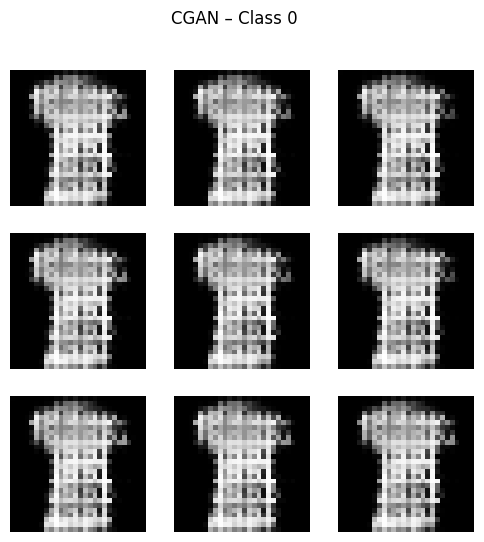

Epoch 17 completed


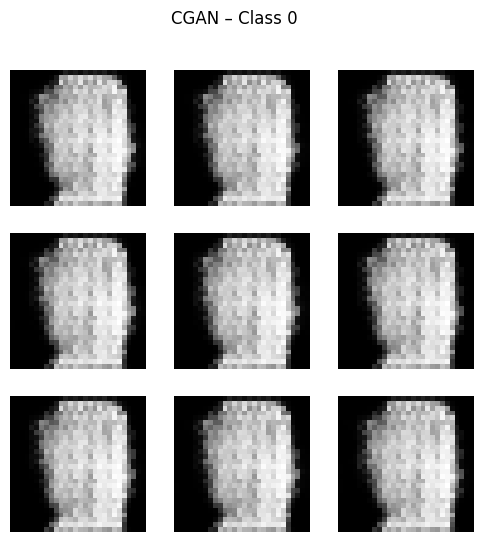

Epoch 18 completed


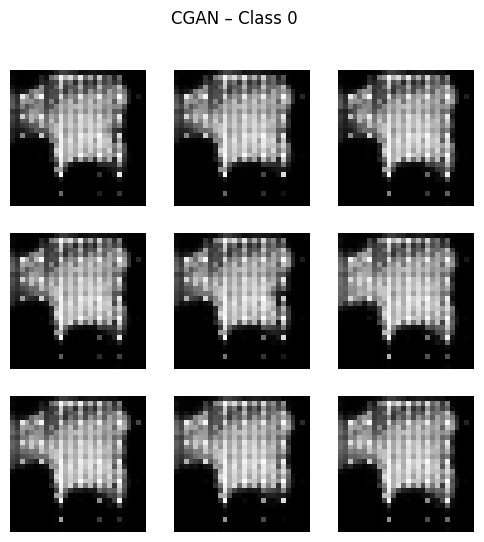

Epoch 19 completed


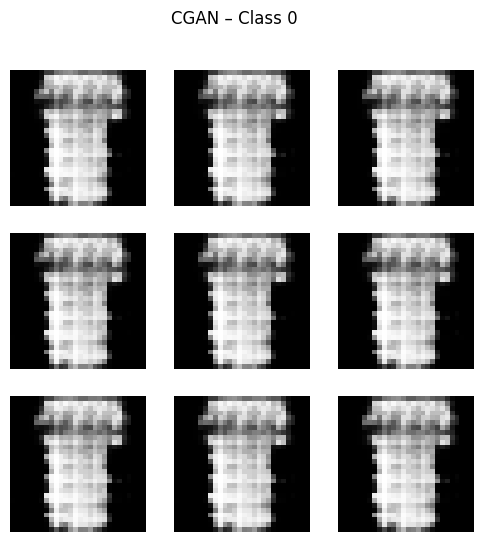

Epoch 20 completed


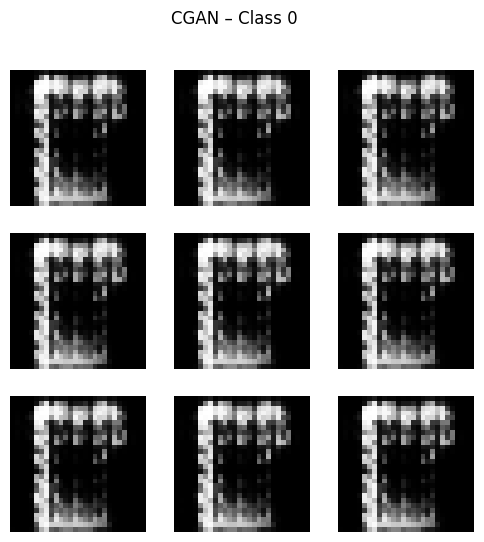

Epoch 21 completed


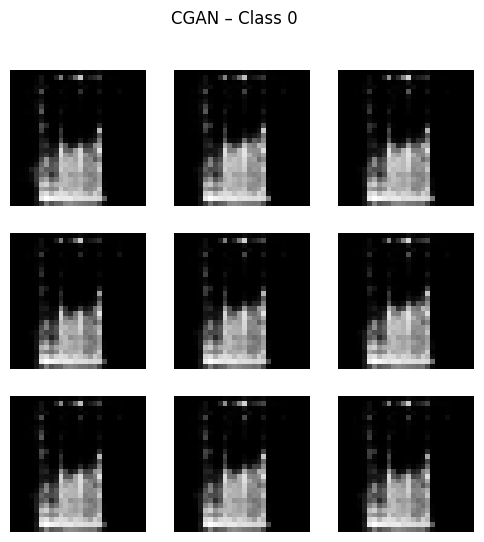

Epoch 22 completed


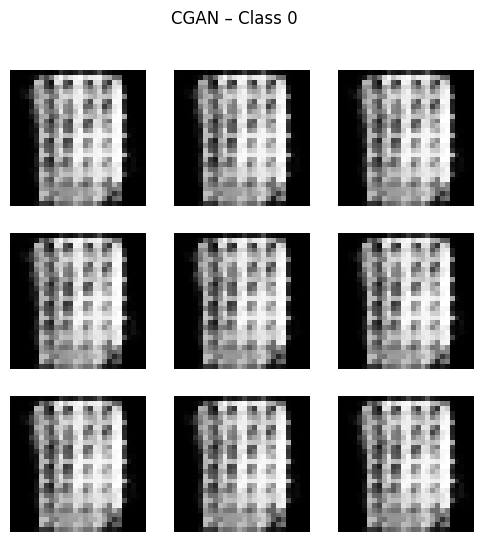

Epoch 23 completed


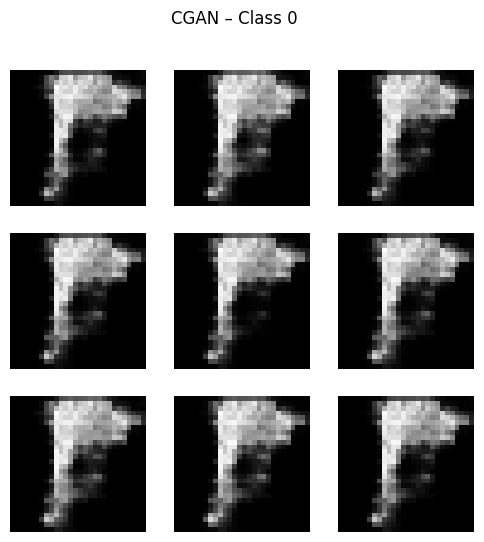

Epoch 24 completed


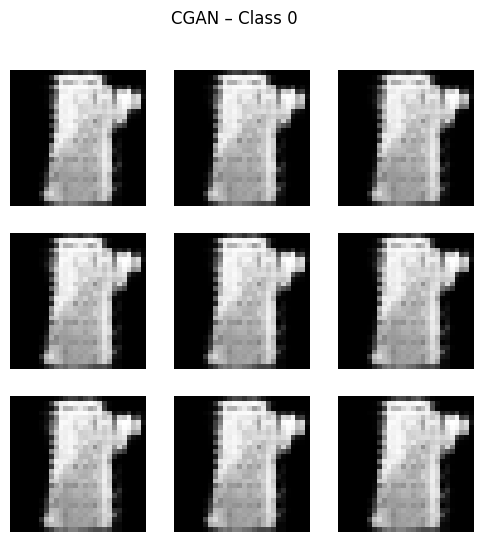

Epoch 25 completed


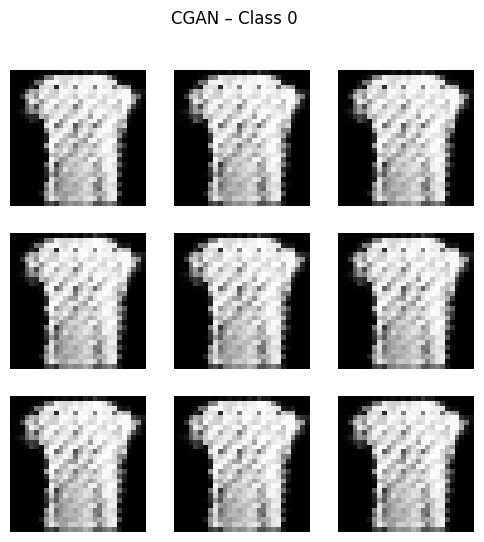

Epoch 26 completed


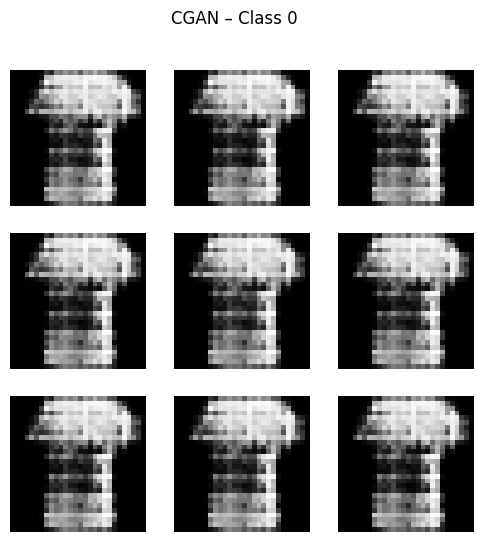

Epoch 27 completed


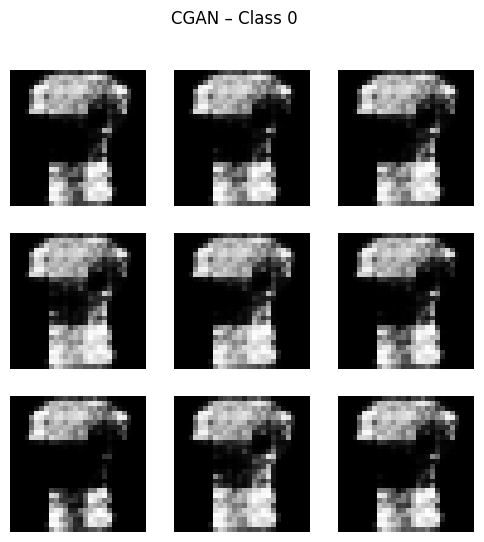

Epoch 28 completed


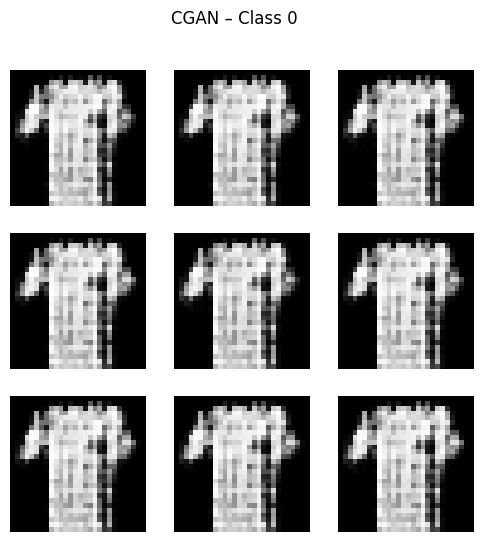

Epoch 29 completed


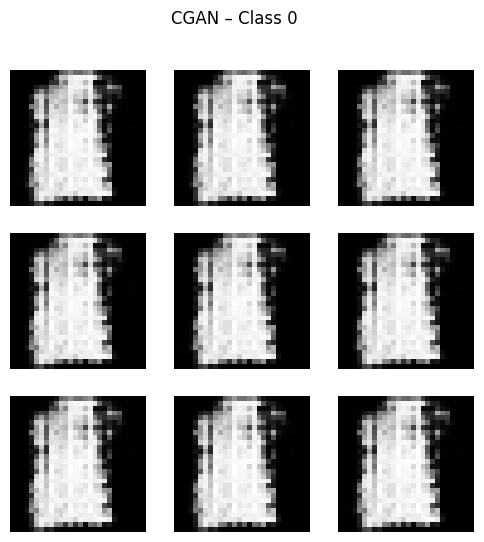

Epoch 30 completed


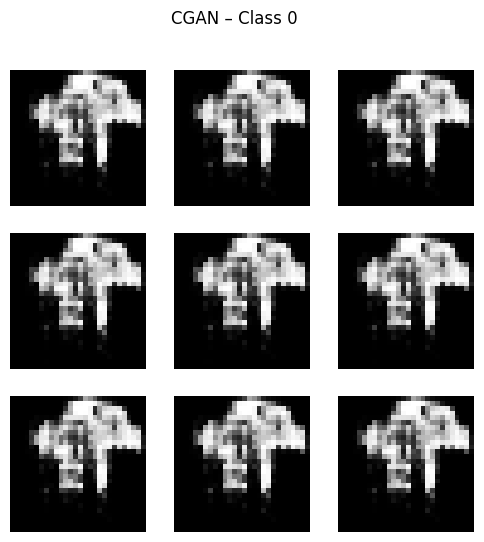

In [16]:
(x_train, y_train), _ = tf.keras.datasets.fashion_mnist.load_data()

x_train = x_train.astype("float32")
x_train = (x_train - 127.5) / 127.5   # normalize to [-1, 1]
x_train = np.expand_dims(x_train, axis=-1)

BUFFER_SIZE = x_train.shape[0]

train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)) \
    .shuffle(BUFFER_SIZE) \
    .batch(BATCH_SIZE)

dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
dataset = dataset.shuffle(60000).batch(BATCH_SIZE)

def build_cgan_generator():
    noise = layers.Input(shape=(LATENT_DIM,))
    label = layers.Input(shape=(1,), dtype="int32")

    label_embedding = layers.Embedding(NUM_CLASSES, LATENT_DIM)(label)
    label_embedding = layers.Flatten()(label_embedding)

    x = layers.Concatenate()([noise, label_embedding])

    x = layers.Dense(7 * 7 * 256, use_bias=False)(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    x = layers.Reshape((7, 7, 256))(x)

    x = layers.Conv2DTranspose(128, 5, strides=1, padding="same", use_bias=False)(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)

    x = layers.Conv2DTranspose(64, 5, strides=2, padding="same", use_bias=False)(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)

    out = layers.Conv2DTranspose(1, 5, strides=2, padding="same",
                                 use_bias=False, activation="tanh")(x)

    return tf.keras.Model([noise, label], out)

def build_cgan_discriminator():
    image = layers.Input(shape=IMG_SHAPE)
    label = layers.Input(shape=(1,), dtype="int32")

    label_embedding = layers.Embedding(NUM_CLASSES, np.prod(IMG_SHAPE))(label)
    label_embedding = layers.Flatten()(label_embedding)
    label_embedding = layers.Reshape(IMG_SHAPE)(label_embedding)

    x = layers.Concatenate()([image, label_embedding])

    x = layers.Conv2D(64, 5, strides=2, padding="same")(x)
    x = layers.LeakyReLU(0.2)(x)
    x = layers.Dropout(0.3)(x)

    x = layers.Conv2D(128, 5, strides=2, padding="same")(x)
    x = layers.LeakyReLU(0.2)(x)
    x = layers.Dropout(0.3)(x)

    x = layers.Flatten()(x)
    out = layers.Dense(1)(x)

    return tf.keras.Model([image, label], out)
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    return real_loss + fake_loss

generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)


@tf.function
def train_step(images, labels):
    noise = tf.random.normal([images.shape[0], LATENT_DIM])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        generated_images = generator([noise, labels], training=True)

        real_output = discriminator([images, labels], training=True)
        fake_output = discriminator([generated_images, labels], training=True)

        gen_loss = generator_loss(fake_output)
        disc_loss = discriminator_loss(real_output, fake_output)

    gradients_gen = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_disc = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_gen, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_disc, discriminator.trainable_variables))

def train(dataset, epochs):
    for epoch in range(epochs):
        for image_batch, label_batch in dataset:
            train_step(image_batch, label_batch)

        print(f"Epoch {epoch+1} completed")
        generate_conditional_images(generator, label=0)

def generate_conditional_images(model, label):
    noise = tf.random.normal([9, LATENT_DIM])
    labels = tf.ones((9, 1), dtype=tf.int32) * label

    imgs = model([noise, labels], training=False)

    plt.figure(figsize=(6, 6))
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow((imgs[i, :, :, 0] + 1) / 2, cmap="gray")
        plt.axis("off")

    plt.suptitle(f"CGAN – Class {label}")
    plt.show()

generator = build_cgan_generator()
discriminator = build_cgan_discriminator()

train(train_dataset, EPOCHS)


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np

# -----------------------------
# 1️⃣ Load and preprocess dataset
# -----------------------------
(x_train, _), _ = tf.keras.datasets.fashion_mnist.load_data()
x_train = x_train.astype("float32")
x_train = (x_train - 127.5) / 127.5           # normalize to [-1, 1]
x_train = np.expand_dims(x_train, axis=-1)    # add channel: (batch,28,28,1)
x_train = tf.image.resize(x_train, [32,32])  # resize to 32x32

BUFFER_SIZE = x_train.shape[0]
BATCH_SIZE = 256
CRITIC_ITER = 5
LATENT_DIM = 100
LAMBDA_GP = 10
EPOCHS = 50

dataset = tf.data.Dataset.from_tensor_slices(x_train)
dataset = dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

# -----------------------------
# 2️⃣ Build DCGAN-style generator
# -----------------------------
def build_generator():
    model = tf.keras.Sequential()
    model.add(layers.Dense(8*8*256, use_bias=False, input_shape=(LATENT_DIM,)))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Reshape((8,8,256)))  # 8x8x256

    model.add(layers.Conv2DTranspose(128, 4, strides=2, padding='same', use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(64, 4, strides=2, padding='same', use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(1, 3, strides=1, padding='same', activation='tanh'))

    return model

wgan_gen = build_generator()

# -----------------------------
# 3️⃣ Build critic (discriminator for WGAN-GP)
# -----------------------------
def build_critic():
    model = tf.keras.Sequential([
        layers.Conv2D(64, 4, strides=2, padding='same', input_shape=(32,32,1)),
        layers.LeakyReLU(0.2),

        layers.Conv2D(128, 4, strides=2, padding='same'),
        layers.LeakyReLU(0.2),

        layers.Flatten(),
        layers.Dense(1)  # no activation
    ])
    return model

critic = build_critic()

# -----------------------------
# 4️⃣ Gradient penalty
# -----------------------------
def gradient_penalty(real, fake):
    batch_size = tf.shape(real)[0]
    alpha = tf.random.uniform([batch_size,1,1,1], 0.0, 1.0)
    interpolated = real + alpha * (fake - real)

    with tf.GradientTape() as tape:
        tape.watch(interpolated)
        pred = critic(interpolated, training=True)

    grads = tape.gradient(pred, interpolated)
    norm = tf.sqrt(tf.reduce_sum(tf.square(grads), axis=[1,2,3]))
    gp = tf.reduce_mean((norm - 1.0)**2)
    return gp

# -----------------------------
# 5️⃣ Optimizers
# -----------------------------
gen_opt = tf.keras.optimizers.Adam(1e-4, beta_1=0.0, beta_2=0.9)
crit_opt = tf.keras.optimizers.Adam(1e-4, beta_1=0.0, beta_2=0.9)

# -----------------------------
# 6️⃣ Training step
# -----------------------------
@tf.function
def wgan_train_step(images):
    images = tf.cast(images, tf.float32)

    batch_size = tf.shape(images)[0]

    # Train critic multiple times
    for _ in range(CRITIC_ITER):
        noise = tf.random.normal([batch_size, LATENT_DIM])
        with tf.GradientTape() as ct:
            fake = wgan_gen(noise, training=True)
            real_score = critic(images, training=True)
            fake_score = critic(fake, training=True)
            gp = gradient_penalty(images, fake)
            c_loss = tf.reduce_mean(fake_score) - tf.reduce_mean(real_score) + LAMBDA_GP * gp

        crit_grads = ct.gradient(c_loss, critic.trainable_variables)
        crit_opt.apply_gradients(zip(crit_grads, critic.trainable_variables))

    # Train generator once
    noise = tf.random.normal([batch_size, LATENT_DIM])
    with tf.GradientTape() as gt:
        fake = wgan_gen(noise, training=True)
        g_loss = -tf.reduce_mean(critic(fake, training=True))

    gen_grads = gt.gradient(g_loss, wgan_gen.trainable_variables)
    gen_opt.apply_gradients(zip(gen_grads, wgan_gen.trainable_variables))

    return g_loss, c_loss

# -----------------------------
# 7️⃣ Training loop
# -----------------------------
for epoch in range(1, EPOCHS+1):
    for imgs in dataset:
        g_loss, c_loss = wgan_train_step(imgs)

    if epoch % 5 == 0:
        print(f"Epoch {epoch} | G Loss: {g_loss:.4f} | C Loss: {c_loss:.4f}")



Epoch 5 | G Loss: 14.8778 | C Loss: -1.9286
Epoch 10 | G Loss: 15.1333 | C Loss: -1.5020
Epoch 15 | G Loss: 14.5677 | C Loss: -1.5170
Epoch 20 | G Loss: 15.9468 | C Loss: -1.4258
